In [13]:
from snn_delays.experimental_models.snn_delay_prun import P_DelaySNN
from snn_delays.snn import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.model_loader import ModelLoader
from snn_delays.utils.train_utils import train, get_device
from snn_delays.utils.test_behavior import tb_save_max_last_acc

dataset = 'shd'
total_time = 50
batch_size = 1024

# DATASET
DL = DatasetLoader(dataset=dataset,
                   caching='gpu',
                   num_workers=0,
                   batch_size=batch_size,
                   total_time=total_time,
                   crop_to=1e6)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()

[CropTime(min=0, max=1000000.0), ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]
<class 'list'>


In [14]:
device = get_device()
snn = ModelLoader('f_rd_2l_hm_ft_rpt1_8776501766784452_max_16epoch', 'abl1_shd50_rd', 1024, device, False)

Running on: cuda:0

[INFO] Delays: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39])

[INFO] Delays o: tensor([0])
1000.0
Delta t: 20.0 ms
Instance of <class 'snn_delays.experimental_models.snn_delay_prun.P_DelaySNN'> loaded successfully


In [15]:
a, b = snn.test(test_loader)

Test Loss: 0.42601779103279114
Avg spk_count per neuron for all 50 time-steps 7.876911640167236
Avg spk per neuron per layer [15.310229405918728, 16.19741745803887]
Test Accuracy of the model on the test samples: 87.809



In [16]:
snn.f1_f2.mask

tensor([[False,  True, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [ True, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ...,  True, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]], device='cuda:0')

In [25]:
snn2 = SNN(dataset_dict,
        snn.structure,
        snn.connection_type, 
        snn.delay, 
        snn.delay_type, 
        snn.reset_to_zero, 
        snn.tau_m, 
        snn.win, 
        snn.loss_fn, 
        snn.batch_size,
        device, 
        True)
snn2.set_network()


[INFO] Delays: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39])

[INFO] Delays o: tensor([0])
1000.0
Delta t: 20.0 ms


In [27]:
for (name_src, param_src), (name_dst, param_dst) in zip(snn.named_parameters(), snn2.named_parameters()):
    assert name_src.split('.')[0] == name_dst.split('.')[0], f"Parameter mismatch: {name_src} != {name_dst}"
    param_dst.data.copy_(param_src.data)

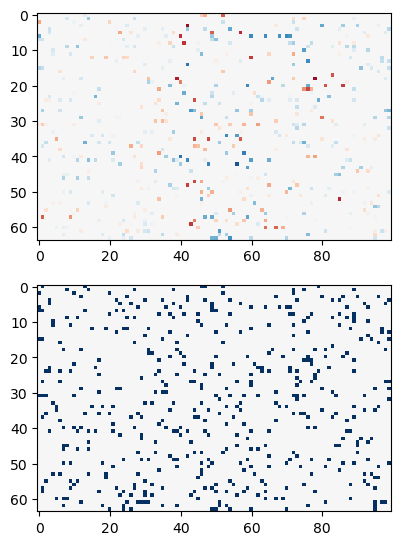

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.subplot(311)
plt.imshow(snn.f1_f2.linear.weight.data.detach().cpu().numpy()[:, :100], vmin=-0.1, vmax=0.1, cmap='RdBu')
plt.subplot(312)
plt.imshow(snn.f1_f2.mask.data.detach().cpu().numpy()[:, :100], vmin=-0.1, vmax=0.1, cmap='RdBu')

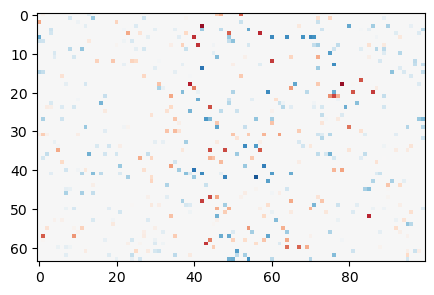

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.imshow(snn2.f1_f2.weight.data.detach().cpu().numpy()[:, :100], vmin=-0.1, vmax=0.1, cmap='RdBu')

In [52]:
a, b = snn2.test(test_loader)

Test Loss: 0.426446000734965
Avg spk_count per neuron for all 50 time-steps 7.876911640167236
Avg spk per neuron per layer [15.310229405918728, 16.19741745803887]
Test Accuracy of the model on the test samples: 87.809

